## Text Classification (Sentiment Classification) - Amazon Alexa Reviews

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
---

<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/1/14/Amazon_Echo_Dot_%28black%29_on_a_wood_surface.jpg"
alt="Fashion MNIST sprite"  length = "600" width="800">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Amazon Alexa Reviews Classification [Source: https://en.wikipedia.org/wiki/Amazon_Echo]
  </td></tr>
</table>


In [69]:
# Library imports

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

In [70]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### Load the dataset

In [71]:
alexa_df = pd.read_csv("./resources/amazon_alexa.tsv", sep="\t")

# Check the data load
alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [72]:
# Check for missing values

alexa_df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [73]:
# Let's Check the positive reviews

alexa_df[alexa_df['feedback'] == 1]['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 2893, dtype: object

In [74]:
# Let's check some negative reviews

alexa_df[alexa_df['feedback'] == 0]['verified_reviews']

46      It's like Siri, in fact, Siri answers more acc...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     Stopped working after 2 weeks ,didn't follow c...
176                                  Sad joke. Worthless.
                              ...                        
3047    Echo Dot responds to us when we aren't even ta...
3048                NOT CONNECTED TO MY PHONE PLAYLIST :(
3067    The only negative we have on this product is t...
3091                                    I didn’t order it
3096    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 257, dtype: object

### Exploratory Data analysis

1    2893
0     257
Name: feedback, dtype: int64


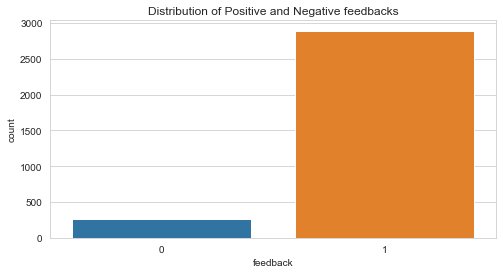

In [75]:
plt.figure(figsize=(8, 4))
sns.countplot(x='feedback', data=alexa_df)
plt.title("Distribution of Positive and Negative feedbacks")
print(alexa_df['feedback'].value_counts())

Text(0.5, 1.0, 'Distribution of rating by feedback')

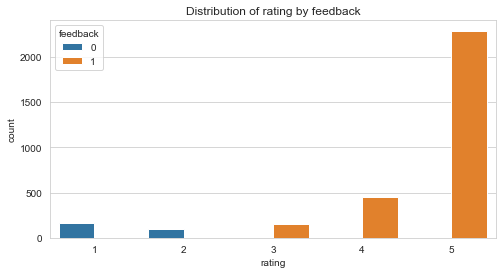

In [76]:
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', hue='feedback', data=alexa_df)
plt.title("Distribution of rating by feedback")

Text(0.5, 1.0, 'Distribution of variation by Feedback')

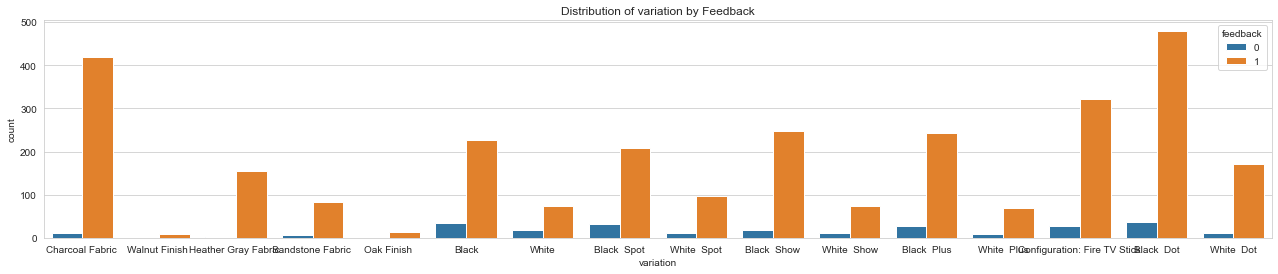

In [77]:
plt.figure(figsize=(22, 4))
sns.countplot(x='variation', hue='feedback', data=alexa_df)
plt.title("Distribution of variation by Feedback")


### Data Preparation

In [78]:
# We would drop the rating and date column

alexa_df = alexa_df.drop(['rating', 'date'], axis=1)

alexa_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [79]:

# we will have to create dummy variables for the column variation and drop the first one, to avoid dummy variable trap

variation_dummies = pd.get_dummies(alexa_df['variation'], drop_first=True)

variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [80]:
# Now we will concatenate this df with the original dataframe

# drop the original variation column
alexa_df = alexa_df.drop(['variation'], axis=1)

# concatenate the data frames
alexa_df = pd.concat([variation_dummies, alexa_df], axis=1)

# check the prepared dataframe
alexa_df.head()


,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,verified_reviews,feedback
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Love my Echo!,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Loved it!,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Sometimes while playing a game, you can answer...",1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,I have had a lot of fun with this thing. My 4 ...,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Music,1


### Demonstrate Count Vectorizer (Tokenization) Example

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 
               'Is this the first document?']

# extract the unique features from the sample data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

print(vectorizer.get_feature_names())

# the tokenizer array as per the feature names
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Implement Count Vectorizer and feature extractor in the dataframe

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

# what gets returned after implementing the tokenizer is a sparse matrix
vectorizer = CountVectorizer()
alexa_vectorizer = vectorizer.fit_transform(alexa_df['verified_reviews'])

type(alexa_vectorizer)

scipy.sparse.csr.csr_matrix

In [83]:
# Check the shape of the alexa_vectorizer
alexa_vectorizer.shape

(3150, 4044)

In [84]:
# Check the feature names
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [85]:
# Check the sparse matrix

alexa_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
# Now we need to concatenate it with the original dataframe

# Let's drop the verified_reviews column
alexa_df.drop(['verified_reviews'], axis=1, inplace=True)

# We will create a dataframe out of the vectorizer array and use the same name
alexa_vectorizer = pd.DataFrame(alexa_vectorizer.toarray())

# Then we will concatenate the vectorizer array with the dataframe
alexa_df = pd.concat([alexa_vectorizer, alexa_df], axis=1)

# Check the dimensions of the data frame
print(alexa_df.shape)

(3150, 4060)


In [87]:
# Let's check the data frame now
alexa_df.head()

,0,1,2,3,4,5,6,7,8,9,...,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,feedback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Perform train, test split

In [88]:
# Extract the features 
X = alexa_df.drop(['feedback'], axis=1)

# Extract the target variable
y = alexa_df['feedback']

In [89]:
# Check the shape of features

X.shape

(3150, 4059)

In [90]:
# Check the shape of target variable
y.shape

(3150,)

In [91]:
# Perform the training, test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

In [92]:
# Check the training feature shape

X_train.shape

(2520, 4059)

In [93]:
# Check the target variable shape

y_train.shape

(2520,)

### Build and Train the model

In [94]:
# NN Model Constants

INPUT_SHAPE = (X_train.shape[1], )
OUTPUT_SHAPE = 1
NUMBER_UNITS = 100
OUTPUT_UNITS = 1

HIDDEN_ACTIVATION = tf.keras.activations.relu
OUTPUT_ACTIVATION = tf.keras.activations.sigmoid

OPTIMIZER_FUNCTION = tf.keras.optimizers.Adam()
LOSS_FUNCTION = tf.keras.losses.BinaryCrossentropy()

METRICS_PARAM = [tf.keras.metrics.BinaryAccuracy()]

NUMBER_EPOCHS = 100
BATCH_SIZE = 100

In [95]:
# Build the model

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(input_shape=INPUT_SHAPE, units=NUMBER_UNITS, activation=HIDDEN_ACTIVATION))
classifier.add(tf.keras.layers.Dense(units=NUMBER_UNITS, activation=HIDDEN_ACTIVATION))
classifier.add(tf.keras.layers.Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACTIVATION))

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               406000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 416,201
Trainable params: 416,201
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Compile the model

classifier.compile(optimizer=OPTIMIZER_FUNCTION, loss=LOSS_FUNCTION, metrics=METRICS_PARAM)

In [97]:
# Train the model

epochs_hist = classifier.fit(X_train, y_train, epochs=NUMBER_EPOCHS, validation_split=0.1)

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 0.4712 - binary_accuracy: 0.8744 - val_loss: 0.2129 - val_binary_accuracy: 0.9206
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.1580 - binary_accuracy: 0.9231 - val_loss: 0.1826 - val_binary_accuracy: 0.9325
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0603 - binary_accuracy: 0.9817 - val_loss: 0.1959 - val_binary_accuracy: 0.9325
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0353 - binary_accuracy: 0.9876 - val_loss: 0.2415 - val_binary_accuracy: 0.9286
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0172 - binary_accuracy: 0.9970 - val_loss: 0.2889 - val_binary_accuracy: 0.9325
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.0128 - binary_accuracy: 0.9951 - val_loss: 0.2924 - val_binary_accuracy: 0.9325
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - los

### Evaluating the Model

In [98]:
epochs_hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

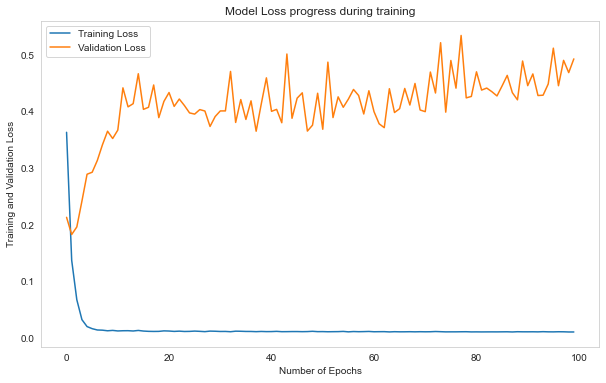

In [99]:
# Visualize the Model Loss
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'])

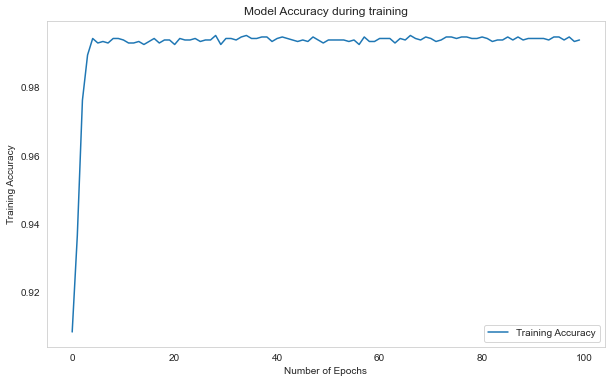

In [100]:
# Visualize the Model Accuracy
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['binary_accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.legend(['Training Accuracy'])

In [101]:
# Now we will predict from the test features

y_predictions = classifier.predict(X_test)

In [102]:
# So the target_predictions has probabilities, in order to use it in confusion matrix

y_predictions = (y_predictions > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test, y_predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(y_test, y_predictions))
print("\n")
print("Classification Report")
print(classification_report(y_test, y_predictions))

Confusion Matrix
[[ 21  30]
 [ 16 563]]


Accuracy Score
0.926984126984127


Classification Report
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        51
           1       0.95      0.97      0.96       579

    accuracy                           0.93       630
   macro avg       0.76      0.69      0.72       630
weighted avg       0.92      0.93      0.92       630

